# Notebook to compare and rank options

Made this notebook to compare various options from the architects list but same can be used to comapre design options as well.
If you are using it from the binder link which I made then you wont be needing to install anything really.
But if you want to use it on your own system then these are the dependiencies [ jupyter, scikit criteira , ipywidgets ]

The comparison method choosen here is TOPSIS but other can also be choosen according to the problem [https://scikit-criteria.quatrope.org/en/latest/tutorial/quickstart.html]

In [1]:
import skcriteria as skc
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from skcriteria.madm import similarity  # here lives TOPSIS
from skcriteria.pipeline import mkpipe  # this function is for create pipelines
from skcriteria.preprocessing import invert_objectives, scalers
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mtplt
from IPython.display import display

In [2]:
pipe = mkpipe(
    invert_objectives.NegateMinimize(),
    scalers.VectorScaler(target="matrix"),  # this scaler transform the matrix
    scalers.SumScaler(target="weights"),  # and this transform the weights
    similarity.TOPSIS(),
)


## Criteria and base data  

Each criteria was given a score from (0-10) based on the research from the Top 100 Architects for 2023 list published by BD Online. The UK architects were filtered from the list and the criterias used were as follows:
1. **London Based:** ( 0:No London Office, 1:HQ in London, 2:Have a London office )
2. **International Portfolio:** Website research ( Scoring between the listed firms ) 
3. **Complex Projects:** Complexity in terms of scale and geometry ( Scoring between the listed firms ) 
4. **High Rise Buildings:** Buildings above 60m in their portfolio
5. **Current Relationship:** (10-Have a relationship, 0-Don't have an relationship) 
6. **Growing:** Based on the ranking from survey ( 1-10: Firms not on list have 1) 
7. **Align with Values:** Check if the ideas promoted by the company align with Ramboll values 
8. **Turnover:** Scoring between listed firms
9. **Locations:** Number of locations from where they operate out of ( Scoring between the listed firms ) 

In [3]:
Base_Data= pd.read_csv("Pandas_Data_frame_23062023.csv")

In [4]:
archi_list=Base_Data["Architect"].to_numpy()

In [5]:
objectives = [max,max,max,max,max,max,max,max]

In [6]:
criteria_1 =["International Portfolio", "Complex projects","Highrise buildings", "Current relationship", "Growing","Align with values","Turnover","Locations"]

layout = widgets.Layout(width='auto', height='auto') #set width and height
style = {'description_width': 'initial'} # Display full text

In [7]:
def criteria_slider(name):
    criteria_slider=widgets.IntSlider(   
    value=5,
    min=0,
    max=10,
    step=1,
    description=str(name),
    style = {'description_width': 'initial'},
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d')
    return criteria_slider

In [8]:
def selection_dropdown():
    selection_dropdown=widgets.Dropdown(
        options=[('No UK Presence', 1), ('HQ in London', 2), ('Office in London', 3)],
        value=1,
        description='Selection Criteria:',
        style= {'description_width': 'initial'}
    )
    return selection_dropdown


## Vizualise the base data

 ### <font color='red'> The scores given for the various categories are displayed in this heat plot. The weighting for each category done later will be applied to these scores </font>  

In [9]:
@interact(
        j=selection_dropdown())

def g(j):
    
    if j == 3 :
        x= Base_Data.loc[Base_Data['London Based'] >=2]
    else:
        x= Base_Data.loc[Base_Data['London Based'] == j]
    
    droped_data= x.drop(x.columns[0:2],axis=1)
    data_matrix= droped_data.to_numpy()
    y=x["Architect"].to_numpy()
    
    dm = skc.mkdm(
    data_matrix,
    objectives,
    weights=[0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5],
    alternatives=y,
    criteria= criteria_1
    )
    rank = pipe.evaluate(dm)
    Ranking_table =  pd.DataFrame({
    'Architects': rank.alternatives,
    'Rank': rank.rank_
    })
    sorted_ranks= Ranking_table.sort_values(by=['Rank'])
    fig=plt.figure(figsize=(8,8), dpi= 100, facecolor='w', edgecolor='k')
    return dm.plot()

interactive(children=(Dropdown(description='Selection Criteria:', options=(('No UK Presence', 1), ('HQ in Lond…

## Adjust the sliders as per preference and view the Rankings

Adjust the sliders to create a decision matrix and view the results accordingly

In [10]:
@interact(a=criteria_slider(criteria_1[0]),
 b=criteria_slider(criteria_1[1]),
 c=criteria_slider(criteria_1[2]),
 d=criteria_slider(criteria_1[3]),
 e=criteria_slider(criteria_1[4]),
 f=criteria_slider(criteria_1[5]),
 g=criteria_slider(criteria_1[6]),
 h=criteria_slider(criteria_1[7]),
        j=selection_dropdown())

def g(j,a,b,c,d,e,f,g,h):
    
    if j == 3 :
        x= Base_Data.loc[Base_Data['London Based'] >=2]
    else:
        x= Base_Data.loc[Base_Data['London Based'] == j]
    
    droped_data= x.drop(x.columns[0:2],axis=1)
    data_matrix= droped_data.to_numpy()
    y=x["Architect"].to_numpy()
    
    dm = skc.mkdm(
    data_matrix,
    objectives,
    weights=[a/10,b/10,c/10,d/10,e/10,f/10,g/10,h/1],
    alternatives=y,
    criteria= criteria_1
    )
    rank = pipe.evaluate(dm)
    Ranking_table =  pd.DataFrame({
    'Architects': rank.alternatives,
    'Rank': rank.rank_
    })
    sorted_ranks= Ranking_table.sort_values(by=['Rank'])

    return sorted_ranks.style.hide()

interactive(children=(Dropdown(description='Selection Criteria:', options=(('No UK Presence', 1), ('HQ in Lond…

# Comparison of all Firms on the List 

Heat map for all the firms considered in the comparison 

<Axes: xlabel='Criteria', ylabel='Alternatives'>

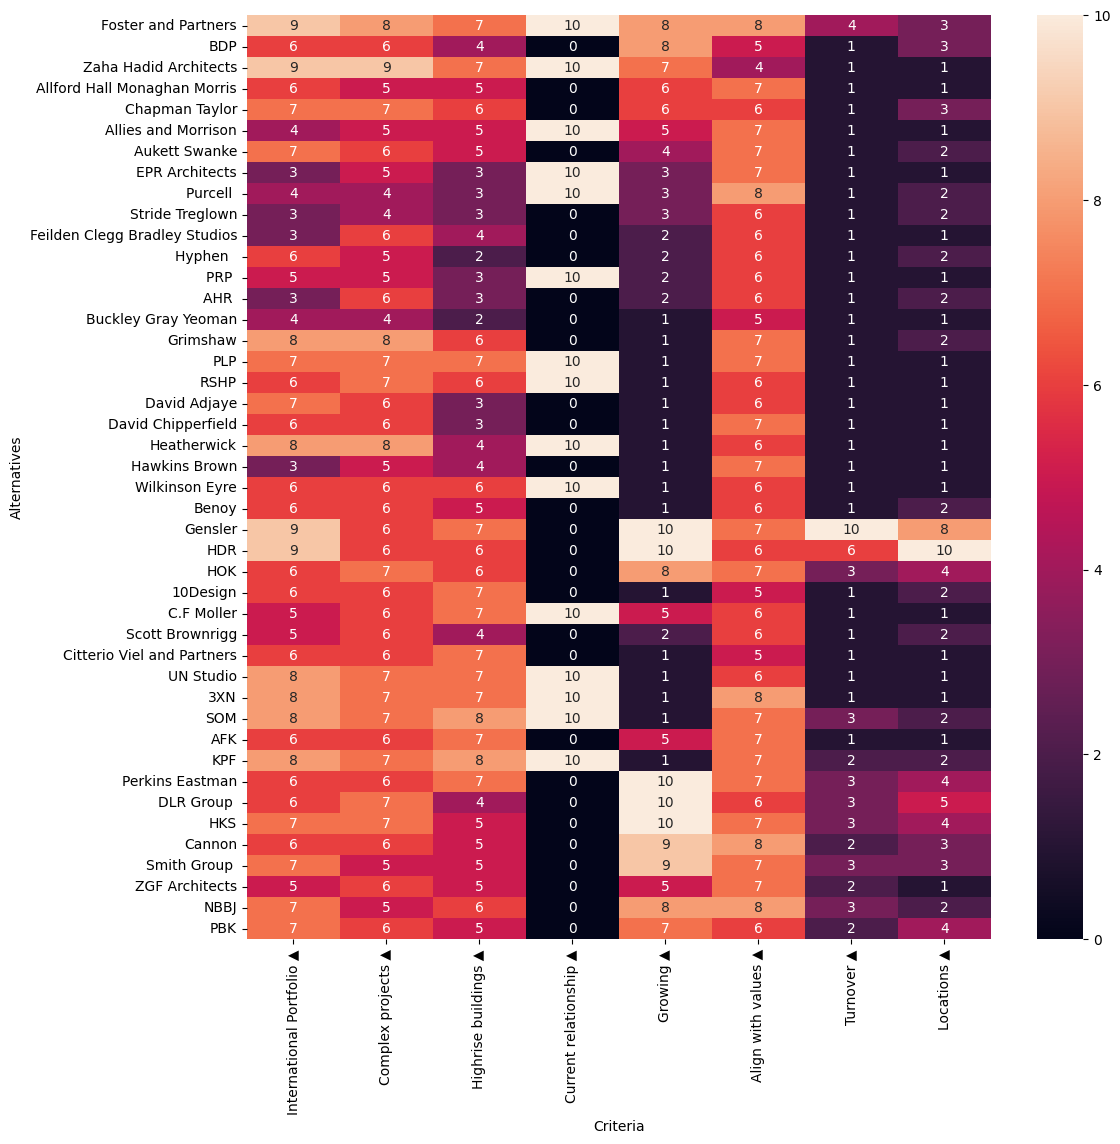

In [11]:
droped_data_2= Base_Data.drop(Base_Data.columns[0:2],axis=1)
data_matrix_all= droped_data_2.to_numpy()
archi_list=Base_Data["Architect"].to_numpy()
    
dm_all = skc.mkdm(
data_matrix_all,
objectives,
weights=[0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5],
alternatives=archi_list,
criteria= criteria_1
)
rank = pipe.evaluate(dm_all)
Ranking_table =  pd.DataFrame({
'Architects': rank.alternatives,
'Rank': rank.rank_
})
sorted_ranks= Ranking_table.sort_values(by=['Rank'])
fig=plt.figure(figsize=(12,12), dpi= 100, facecolor='w', edgecolor='k')
dm_all.plot()

## Adjust the sliders as per preference and view the Rankings
Ranking comparison for all the firms

In [12]:
@interact(a=criteria_slider(criteria_1[0]),
 b=criteria_slider(criteria_1[1]),
 c=criteria_slider(criteria_1[2]),
 d=criteria_slider(criteria_1[3]),
 e=criteria_slider(criteria_1[4]),
 f=criteria_slider(criteria_1[5]),
 g=criteria_slider(criteria_1[6]),
 h=criteria_slider(criteria_1[7]),)

def g(a,b,c,d,e,f,g,h):
    
    droped_data_3= Base_Data.drop(Base_Data.columns[0:2],axis=1)
    data_matrix_all_2= droped_data_3.to_numpy()
    archi_list=Base_Data["Architect"].to_numpy()
    
    dm = skc.mkdm(
    data_matrix_all_2,
    objectives,
    weights=[a/10,b/10,c/10,d/10,e/10,f/10,g/10,h/1],
    alternatives=archi_list,
    criteria= criteria_1
    )
    rank = pipe.evaluate(dm)
    Ranking_table =  pd.DataFrame({
    'Architects': rank.alternatives,
    'Rank': rank.rank_
    })
    sorted_ranks= Ranking_table.sort_values(by=['Rank'])

    return sorted_ranks.style.hide()

interactive(children=(IntSlider(value=5, continuous_update=False, description='International Portfolio', max=1…

# The rankings for firms based on decision matrix discussed on 11/07/2023

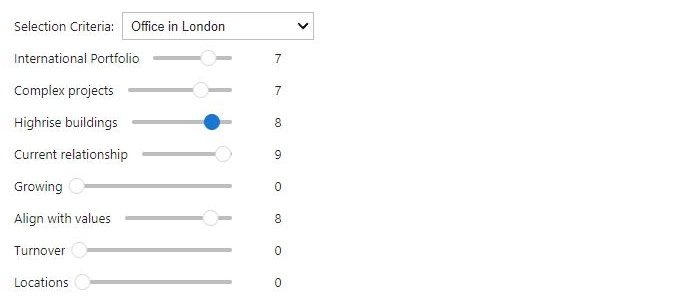

In [15]:
office_london= Base_Data.loc[Base_Data['London Based'] >=2]
droped_data_4= office_london.drop(office_london.columns[0:2],axis=1)
data_matrix_all_2= droped_data_4.to_numpy()
archi_list=office_london["Architect"].to_numpy()
    
dm = skc.mkdm(
data_matrix_all_2,
objectives,
weights=[7,7,8,9,0,8,0,0],
alternatives=archi_list,
criteria= criteria_1
)
rank = pipe.evaluate(dm)
Ranking_table =  pd.DataFrame({
'Architects': rank.alternatives,
'Rank': rank.rank_
})
sorted_ranks= Ranking_table.sort_values(by=['Rank'])
sorted_ranks.style.hide()


Architects,Rank
Foster and Partners,1
KPF,2
SOM,2
3XN,3
PLP,4
Zaha Hadid Architects,5
RSHP,6
Wilkinson Eyre,7
Heatherwick,8
Allies and Morrison,9
